Randomizing a frequency:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

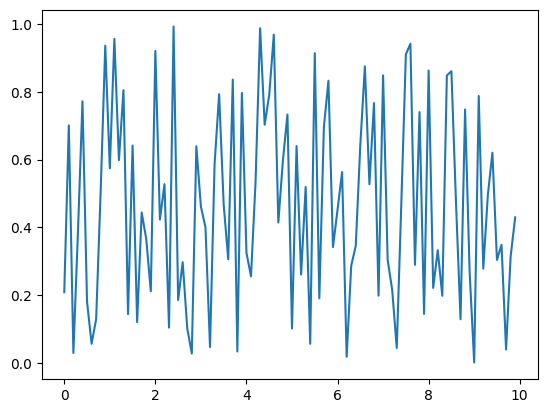

In [212]:
time = np.arange(0, 10, 0.1)

frequency = rng.random(size=time.shape)

plt.plot(time, frequency)
plt.show()

Generating sound with a random frequency for each sample:

In [139]:
sample_rate = 44100 # Samples per second

duration = 5.0 # Duration in seconds

samples = np.arange(duration * sample_rate)

freq_hz = rng.random(size=samples.shape) # Frequency / pitch of the sine wave

waveform = np.sin(2 * np.pi * samples * freq_hz / sample_rate)

waveform *= 0.3 # lower the volume

Audio(waveform, rate=sample_rate)

Extra: Modulating a sine wave

In [219]:
sample_rate = 44100

duration = 3.0

f_c = 440.0 # Frequency of the carrier, in hz
f_m = 110.0 # Frequency of the modulator, in hz
k = 3.0 # deviation constant. No units

samples = np.arange(duration * sample_rate)
carrier = 2 * np.pi * samples * f_c / sample_rate
modulator = k * np.sin(2 * np.pi * samples * f_m / sample_rate)
waveform = np.cos(carrier + modulator)

waveform *= 0.3

Audio(waveform, rate=sample_rate)

### Perlin Noise

In [1]:
!pip install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /tmp/pip-req-build-i868k497
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-i868k497
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done
  Created wheel for perlin-numpy: filename=perlin_numpy-0.0.0-py3-none-any.whl size=4725 sha256=f4b0c0f5f6614343b28c9a535e25b63f3a22ab436478ece36afc81177c2d1992
  Stored in directory: /tmp/pip-ephem-wheel-cache-sylv33j6/wheels/e1/27/2f/c4a80de6e28009b6fd435bb52156a16937c7939e5dcdbc9850
Successfully built perlin-numpy


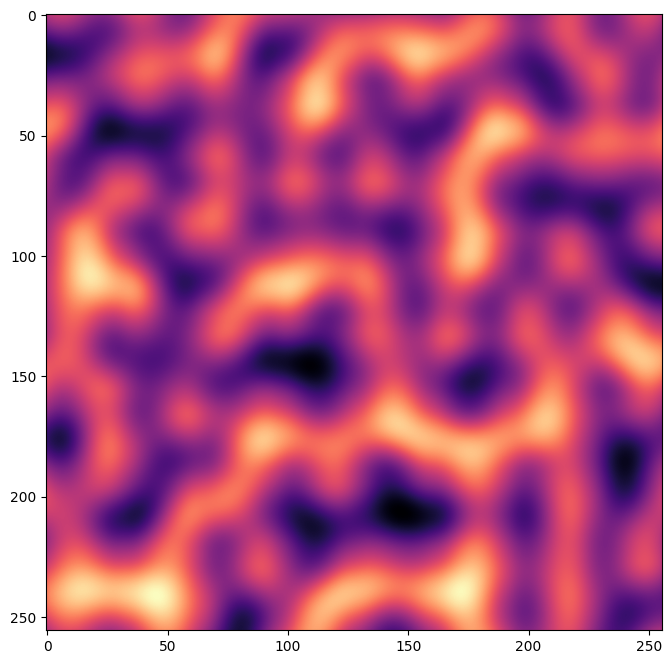

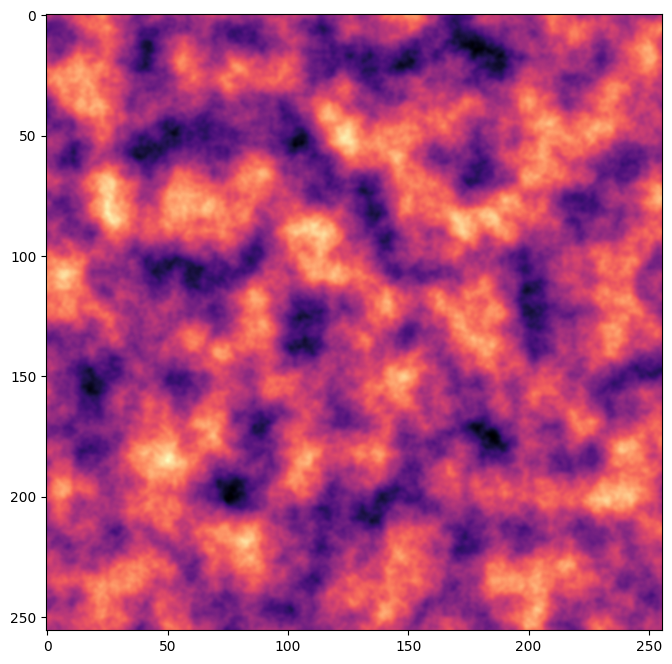

In [6]:
from perlin_numpy import generate_perlin_noise_2d, generate_fractal_noise_2d

np.random.seed(54)
noise = generate_perlin_noise_2d((256, 256), (8, 8))

plt.figure(figsize=(8,8))
plt.imshow(noise, cmap='magma', interpolation='lanczos')

np.random.seed(0)
noise = generate_fractal_noise_2d((256, 256), (8, 8), 5)

plt.figure(figsize=(8,8))
plt.imshow(noise, cmap='magma', interpolation='lanczos')

plt.show()

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML
from perlin_numpy import generate_perlin_noise_3d

np.random.seed(0)
noise = generate_perlin_noise_3d(
    (32, 256, 256), (1, 4, 4), tileable=(True, False, False)
)

fig = plt.figure()
images = [
    [plt.imshow(
        layer, cmap='magma', interpolation='lanczos', animated=True
    )]
    for layer in noise
]

anim = animation.ArtistAnimation(fig, images, interval=50, blit=True)

# plt.show()
plt.close()
HTML(anim.to_html5_video())

In [19]:
from perlin_numpy import generate_fractal_noise_3d

np.random.seed(0)
noise = generate_fractal_noise_3d(
    (32, 256, 256), (1, 4, 4), 4, tileable=(True, False, False)
)

fig = plt.figure()
images = [
    [plt.imshow(
        layer, cmap='magma', interpolation='lanczos', animated=True
    )]
    for layer in noise
]
anim = animation.ArtistAnimation(fig, images, interval=50, blit=True)

# plt.show()
plt.close()
HTML(anim.to_html5_video())